In [131]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

import matplotlib.pyplot as plt

In [132]:
df = quandl.get("WIKI/TCS")

In [133]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,5.40,5.64,5.3700,5.50,151119.0,0.0,1.0,5.40,5.64,5.3700,5.50,151119.0
2018-03-22,5.45,5.48,5.2300,5.36,217377.0,0.0,1.0,5.45,5.48,5.2300,5.36,217377.0
2018-03-23,5.39,5.44,5.2600,5.31,154149.0,0.0,1.0,5.39,5.44,5.2600,5.31,154149.0
2018-03-26,5.41,5.65,5.3101,5.61,177731.0,0.0,1.0,5.41,5.65,5.3101,5.61,177731.0
2018-03-27,5.64,5.65,5.5000,5.57,116105.0,0.0,1.0,5.64,5.65,5.5000,5.57,116105.0


In [134]:
df = df[['Adj. Close']]

In [135]:
forecast_out = int(30)

In [136]:
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

In [137]:
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [138]:
X

array([[ 2.06547367],
       [ 1.98691196],
       [ 1.98691196],
       ...,
       [-0.78955151],
       [-0.76182385],
       [-0.76552087]])

In [139]:
X_forecast = X[-forecast_out:]

In [140]:
X = X[:-forecast_out]

In [141]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [142]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [143]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [144]:
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9471599833339027


In [145]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[4.95714488 5.03817224 5.01116312 4.94814184 4.82209929 4.71406282
 4.73206889 4.80409321 4.75907801 4.96614792 5.00216008 4.81309625
 4.84010537 4.70505978 4.87611753 4.88512057 4.70505978 5.23623911
 5.46131509 5.34427558 5.30826342 5.43430597 5.54234245 5.54234245
 5.31726646 5.40729686 5.2812543  5.23623911 5.50633029 5.47031813]


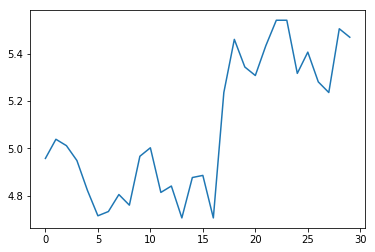

In [146]:
plt.plot(forecast_prediction)